<a href="https://colab.research.google.com/github/ajaythakur3369/PRODIGY_ML_04/blob/main/Task_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project - Task-04**
## **Developed By - Ajay Thakur (2016kuec2026@iiitkota.ac.in)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota (An Institute of National Importance under an Act of Parliament)**
## **Submitted To - Prodigy InfoTech**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/PRODIGY_ML_04/blob/main/Task_04.ipynb)**
## **Project Link (Drive) - [Click here](https://colab.research.google.com/drive/1e1pfME3WBSC_YDalk0tcjj0yDURe5Ehj)**

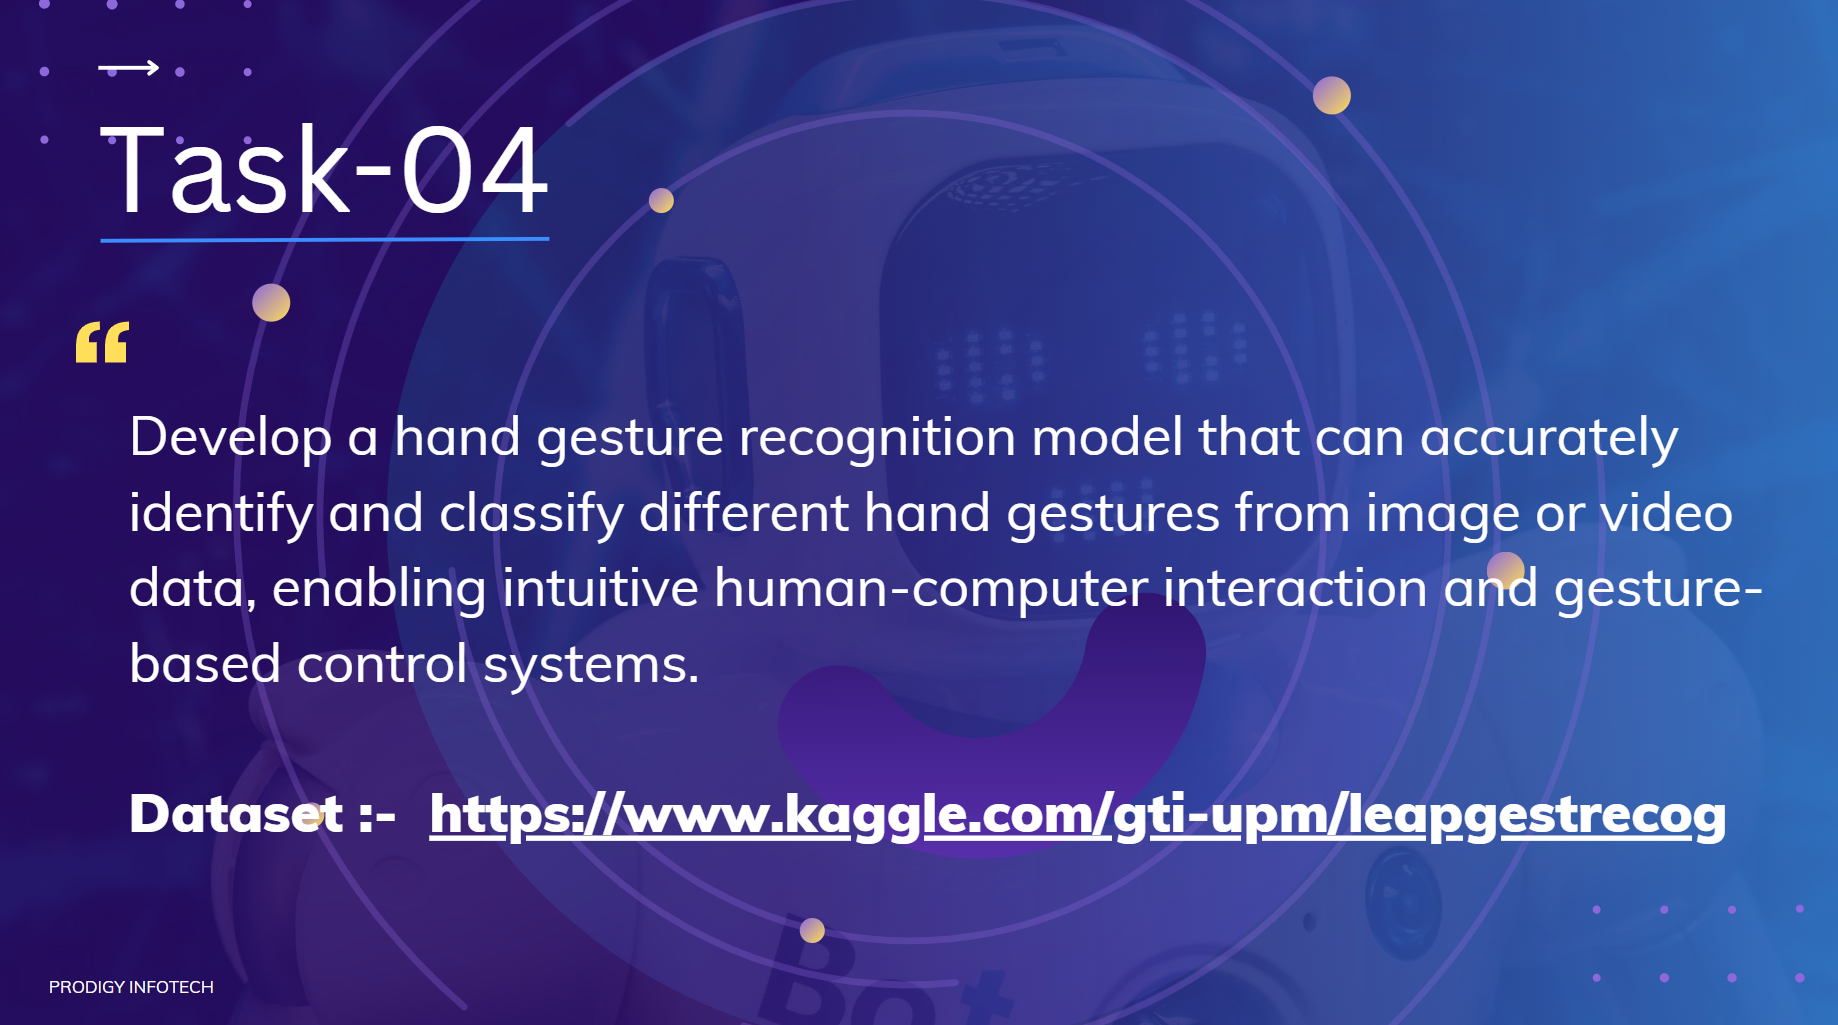

# **Problem Statement -**

Develop a hand gesture recognition model that can accurately identify and classify different hand gestures from image or video data, enabling intuitive human-computer interaction and gesture-based control systems.

**Dataset -** https://www.kaggle.com/gti-upm/leapgestrecog

# **Let's Begin !**

In [ ]:
# Import all the required libraries
import keras
# For plotting
import matplotlib.pyplot as plt
# Provides a way of using operating system dependent functionality
import os
# Image handling library
import cv2
import numpy as np
# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Access the Drive from Colab, for accessing the file
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
CATEGORIES = ["01_palm", '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']
IMG_SIZE = 50
# Paths for dataset
data_path = "/content/drive/MyDrive/Folders/leapGestRecogg"

In [ ]:
# Loading the images and their class(0 - 9)
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[6, 5, 5, ..., 3, 4, 4],
        [5, 5, 6, ..., 3, 4, 4],
        [5, 5, 6, ..., 4, 5, 5],
        ...,
        [5, 5, 6, ..., 4, 4, 4],
        [6, 5, 6, ..., 4, 5, 5],
        [6, 5, 5, ..., 4, 3, 3]], dtype=uint8),
 0]

In [ ]:
# Shuffle the input data
import random
random.shuffle(image_data)

In [ ]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

In [ ]:
label[:10]

[9, 4, 7, 6, 2, 7, 7, 9, 3, 1]

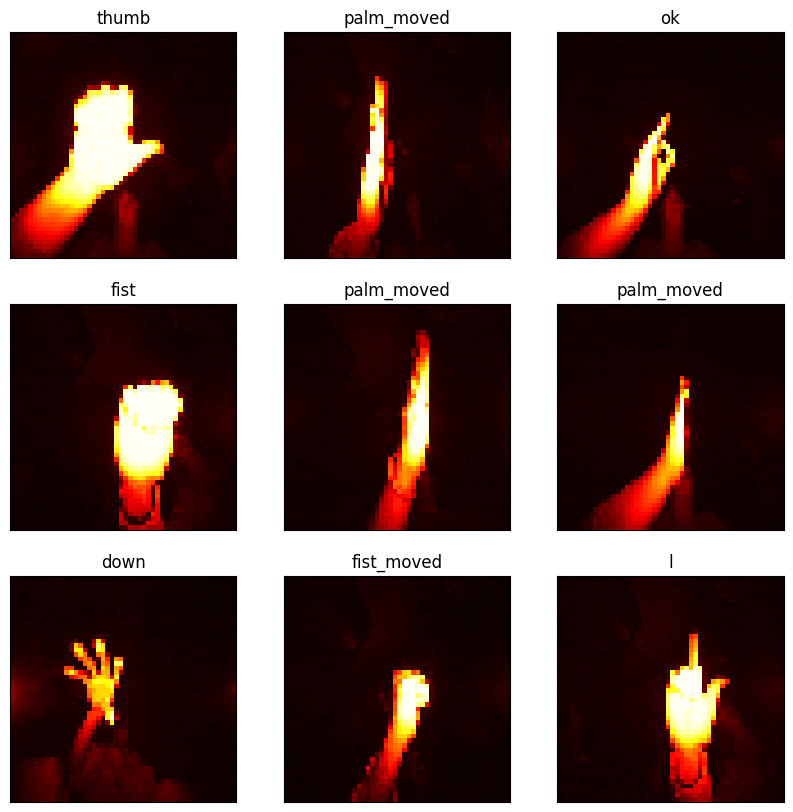

In [ ]:
plt.figure(1, figsize = (10, 10))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(image_data[i][0], cmap = 'hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [ ]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20060, 50, 50)

In [ ]:
# One hot encoding
label = keras.utils.to_categorical(label, num_classes = 10, dtype = 'i1')
label[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int8)

In [ ]:
# Reshaping the data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
# Splitting the input_data to train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state = 0)

In [ ]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))

model.add(Conv2D(filters = 32, kernel_size = (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/10
439/439 [==============================] - 116s 260ms/step - loss: 0.3682 - accuracy: 0.8767 - val_loss: 0.0256 - val_accuracy: 0.9934
Epoch 2/10
439/439 [==============================] - 117s 267ms/step - loss: 0.0181 - accuracy: 0.9947 - val_loss: 0.0065 - val_accuracy: 0.9978
Epoch 3/10
439/439 [==============================] - 113s 258ms/step - loss: 0.0070 - accuracy: 0.9976 - val_loss: 0.0021 - val_accuracy: 0.9993
Epoch 4/10
439/439 [==============================] - 117s 265ms/step - loss: 0.0058 - accuracy: 0.9985 - val_loss: 0.0023 - val_accuracy: 0.9993
Epoch 5/10
439/439 [==============================] - 117s 267ms/step - loss: 0.0052 - accuracy: 0.9980 - val_loss: 0.0045 - val_accuracy: 0.9990
Epoch 6/10
439/439 [==============================] - 117s 267ms/step - loss: 0.0042 - accuracy: 0.9986 - val_loss: 0.0020 - val_accuracy: 0.9995
Epoch 7/10
439/439 [==============================] - 125s 286ms/step - loss: 0.0036 - accuracy: 0.9986 - val_loss: 0.0029 -

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                        

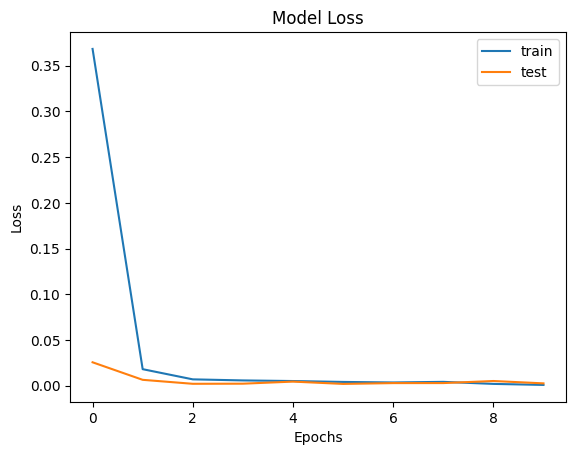

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

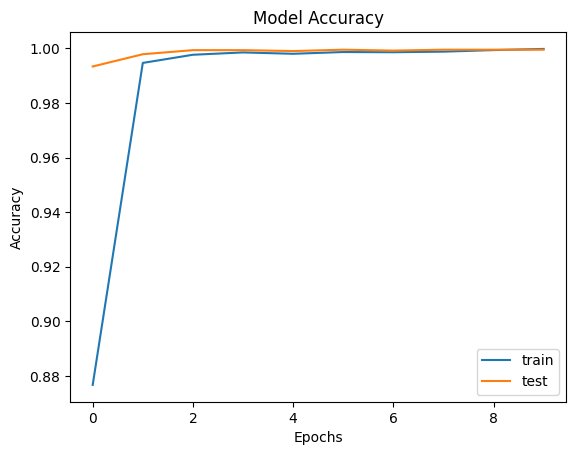

In [ ]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

189/189 [==============================] - 14s 73ms/step


[]

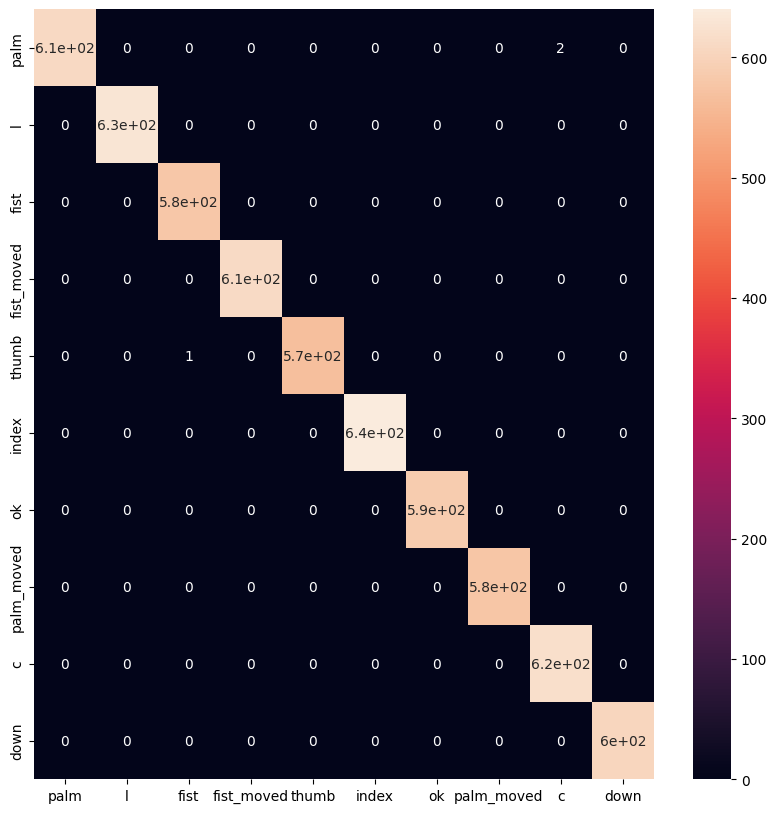

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize = (10, 10))
cm = confusion_matrix(np.argmax(y_test, axis = 1), np.argmax(model.predict(X_test), axis = 1))
sn.heatmap(cm, annot = True, xticklabels = cat, yticklabels = cat)
plt.plot()

In [ ]:
# Calculate loss and accuracy on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

189/189 [==============================] - 12s 63ms/step - loss: 0.0026 - accuracy: 0.9995
Test accuracy: 99.95%
